# WorldCup historical 경기결과를 통해 예측해보는 2018 WorldCup 우승팀

In [8]:
# 필요한 패키지 임포트  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# 데이터 읽어오기
results = pd.read_csv("C:/Users/joyh1/worldcup_predict_younghun/WorldCupMatches.csv")

In [10]:
# 데이터 구성 살펴보기
results.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [11]:
# 나중에 결측치를 dropna.() 로 제거해주자!!
results.tail()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
4567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
results.shape

(4572, 20)

## 1) Exploring the Data

불러온 results 데이터 구성을 보면 20개의 칼럼으로 이루어져 있다. 
하지만 이런 데이터를 통해서 승패를 예측하는데 기여하는 Feature들을 필터링 해본다면 'Year', 'Stage', Home team name', 'Away team name', 'Home team score', 'Away team score' 정도로 총 6개의 정도를 꼽아볼 수 있겠다. 

나머지 feature들은 부수적인 feature들로 월드컵 승자를 예측하는데 영향을 거의 주지 않은 feature들이므로 삭제를 해야 할 거 같다.

가장 먼저 할 작업은 'winner' 라는 새로운 칼럼(열=속성=Feature)을 만들어서 각 경기의 승리팀을 뽑아내야 한다.

In [13]:
winner = []
for i in range(len(results['Home Team Name'])):
    if results['Home Team Goals'][i] > results['Away Team Goals'][i]:
        winner.append(results['Home Team Name'][i])
    elif results['Home Team Goals'][i] < results['Away Team Goals'][i]:
        winner.append(results['Away Team Name'][i])
    else:
        winner.append('Tie')
        
results['winning_team'] = winner

# 경기 당 '골득실 차이'를 나타내는 새로운 칼럼 추가
results['goal_difference'] = np.absolute(results['Home Team Goals'] - results['Away Team Goals'])
results.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,...,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,winning_team,goal_difference
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,...,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX,France,3.0
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,...,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL,USA,3.0
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,...,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA,Yugoslavia,1.0
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,...,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER,Romania,2.0
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,...,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA,Argentina,1.0


In [14]:
results.tail()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,...,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,winning_team,goal_difference
4567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tie,NaN
4568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tie,NaN
4569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tie,NaN
4570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tie,NaN
4571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tie,NaN


In [15]:
# 결측치 삭제 후 데이터 끝 다시 살펴보기
results = results.dropna()
results.tail()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,...,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,winning_team,goal_difference
847,2014.0,05 Jul 2014 - 17:00,Quarter-finals,Arena Fonte Nova,Salvador,Netherlands,0.0,0.0,Costa Rica,Netherlands win on penalties (4 - 3),...,0.0,Ravshan IRMATOV (UZB),RASULOV Abduxamidullo (UZB),KOCHKAROV Bakhadyr (KGZ),255953.0,300186488.0,NED,CRC,Tie,0.0
848,2014.0,08 Jul 2014 - 17:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1.0,7.0,Germany,,...,5.0,RODRIGUEZ Marco (MEX),TORRENTERA Marvin (MEX),QUINTERO Marcos (MEX),255955.0,300186474.0,BRA,GER,Germany,6.0
849,2014.0,09 Jul 2014 - 17:00,Semi-finals,Arena de Sao Paulo,Sao Paulo,Netherlands,0.0,0.0,Argentina,Argentina win on penalties (2 - 4),...,0.0,C�neyt �AKIR (TUR),DURAN Bahattin (TUR),ONGUN Tarik (TUR),255955.0,300186490.0,NED,ARG,Tie,0.0
850,2014.0,12 Jul 2014 - 17:00,Play-off for third place,Estadio Nacional,Brasilia,Brazil,0.0,3.0,Netherlands,,...,2.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255957.0,300186502.0,BRA,NED,Netherlands,3.0
851,2014.0,13 Jul 2014 - 16:00,Final,Estadio do Maracana,Rio De Janeiro,Germany,1.0,0.0,Argentina,Germany win after extra time,...,0.0,Nicola RIZZOLI (ITA),Renato FAVERANI (ITA),Andrea STEFANI (ITA),255959.0,300186501.0,GER,ARG,Germany,1.0


In [16]:
# 'Home Team Goals', 'Away Team Goals', 'goal_difference' 칼럼의 value들을 정수형으로 바꾸기
results = results.astype({'Year':int, 'Home Team Goals' : int, 'Away Team Goals' : int, 'goal_difference' : int})
results.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,...,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,winning_team,goal_difference
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,...,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX,France,3
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,,...,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL,USA,3
2,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,,...,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA,Yugoslavia,1
3,1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,,...,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER,Romania,2
4,1930,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,,...,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA,Argentina,1


In [17]:
# 우리가 원하는 결과를 예측하는데 필요없는 Feature들을 삭제하자

results = results.drop(['Datetime','Stadium','City','Win conditions','Attendance','Assistant 1','Assistant 2','Referee',
                      'RoundID','MatchID','Home Team Initials','Away Team Initials'], axis=1)

In [18]:
results.head()

,Year,Stage,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Half-time Home Goals,Half-time Away Goals,winning_team,goal_difference
0,1930,Group 1,France,4,1,Mexico,3.0,0.0,France,3
1,1930,Group 4,USA,3,0,Belgium,2.0,0.0,USA,3
2,1930,Group 2,Yugoslavia,2,1,Brazil,2.0,0.0,Yugoslavia,1
3,1930,Group 3,Romania,3,1,Peru,1.0,0.0,Romania,2
4,1930,Group 1,Argentina,1,0,France,0.0,0.0,Argentina,1


### 임의로 하나의 국가 'France' 로 정하고 subset of data로 우선 샘플 작업을 해보자

In [19]:
# France가 치뤘던 경기만 담은 dataframe 출력
df = results[(results['Home Team Name'] == 'France') | (results['Away Team Name'] == 'France')]
france = df.iloc[:]
france.head()

,Year,Stage,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Half-time Home Goals,Half-time Away Goals,winning_team,goal_difference
0,1930,Group 1,France,4,1,Mexico,3.0,0.0,France,3
4,1930,Group 1,Argentina,1,0,France,0.0,0.0,Argentina,1
9,1930,Group 1,Chile,1,0,France,0.0,0.0,Chile,1
18,1934,Preliminary round,Austria,3,2,France,0.0,0.0,Austria,1
37,1938,First round,France,3,1,Belgium,2.0,1.0,France,2


([<matplotlib.axis.XTick at 0x241ac754470>],
 <a list of 1 Text xticklabel objects>)

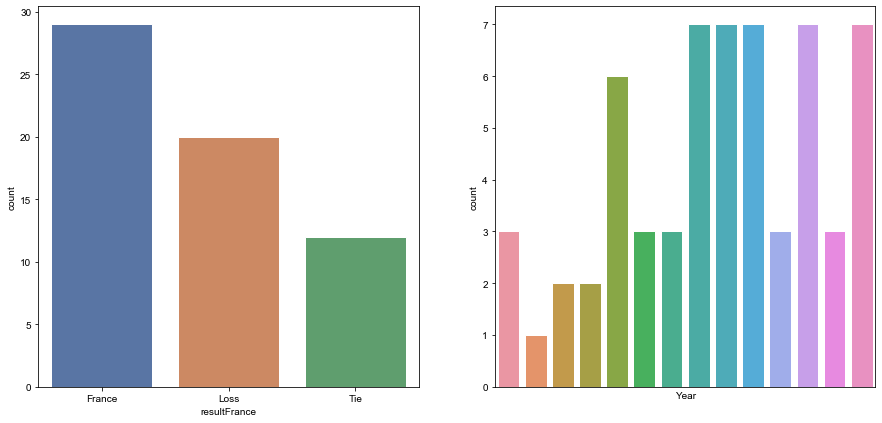

In [20]:
# France를 이긴 팀들을 모두 Loss 값으로 돌려서 시각화 하기

winrate = []
for row in france['winning_team']:
    if row != 'France' and row != 'Tie':
        winrate.append('Loss')
    else:
        winrate.append(row)
dfwinrate = pd.DataFrame(winrate, columns=['resultFrance'])

# Seaborn으로 시각화 그래프 그리기
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(15,7, 5.27)
sns.set(style = 'darkgrid')
sns.countplot(x='resultFrance', data=dfwinrate, ax = ax[0])
sns.countplot(x='Year', data=france, ax = ax[1])
plt.xticks(np.arange(min(france.Year), max(france.Year), 100))

## - 그래프 시각화 결과 분석

#### 첫번째 그래프를 보면 France의 역대 월드컵 전적을 살펴볼 수가 있다. 
#### 두번째 그래프는 연도별 France의 월드컵 경기수를 나타내는 그래프 입니다.

# ---------------------------------------------------------

## 2018년 월드컵 참가자 국가들로 범위 제한

In [21]:
# 2018년 월드컵 참가자 팀 리스트
wc_teams = ['Australia', 'Iran', 'Japan', 'Korea Republic',
           'Saudi Arabia', 'Egypt', 'Morocco', 'Nigeria',
           'Senegal', 'Tunisia', 'Costa Rica', 'Mexico',
           'Panama', 'Argentina', 'Brazil', 'Colombia',
           'Peru', 'Uruguay', 'Belgium', 'Croatia',
           'Denmakr', 'England', 'France', 'Germany',
           'Iceland', 'Poland', 'Portgual', 'Russia',
           'Serbia', 'Spain', 'Sweden', 'Switzerland']

# 전체 원시 데이터에서 2018년 월드컵 참가국으로만 이루어진 데이터 프레임으로 축소
df_teams_home = results[results['Home Team Name'].isin(wc_teams)]
df_teams_away = results[results['Away Team Name'].isin(wc_teams)]
df_teams = pd.concat((df_teams_home, df_teams_away))
df_teams.drop_duplicates()
df_teams.count()

Year                    890
Stage                   890
Home Team Name          890
Home Team Goals         890
Away Team Goals         890
Away Team Name          890
Half-time Home Goals    890
Half-time Away Goals    890
winning_team            890
goal_difference         890
dtype: int64

In [22]:
df_teams.head()

,Year,Stage,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Half-time Home Goals,Half-time Away Goals,winning_team,goal_difference
0,1930,Group 1,France,4,1,Mexico,3.0,0.0,France,3
4,1930,Group 1,Argentina,1,0,France,0.0,0.0,Argentina,1
8,1930,Group 3,Uruguay,1,0,Peru,0.0,0.0,Uruguay,1
10,1930,Group 1,Argentina,6,3,Mexico,3.0,1.0,Argentina,3
11,1930,Group 2,Brazil,4,0,Bolivia,1.0,0.0,Brazil,4


In [23]:
# 우승팀 예측에 필요하지 않은 속성값들 제거
df_teams = df_teams.drop(['Year','Stage','Home Team Goals',
                         'Away Team Goals', 'Half-time Home Goals',
                         'Half-time Away Goals','goal_difference'], axis=1)
df_teams.head()

,Home Team Name,Away Team Name,winning_team
0,France,Mexico,France
4,Argentina,France,Argentina
8,Uruguay,Peru,Uruguay
10,Argentina,Mexico,Argentina
11,Brazil,Bolivia,Brazil


## ML 모델 빌딩

In [26]:
# ML모델 처리를 하기 위해 숫자값으로 예측치(y값)를 수정

# 데이터 인덱스 번호 재설정
df_teams = df_teams.reset_index(drop=True)
df_teams.loc[df_teams.winning_team == df_teams.Home Team Name, 'winning_team'] = 2
df_teams.loc[df_teams.winning_team == 'Tie', 'winning_team'] = 1
df_teams.loc[df_teams.winning_team == df_teams.Away Team Name, 'winning_team'] = 0

df.teams.head()

SyntaxError: invalid syntax (<ipython-input-26-c29fb84e5141>, line 5)